# Chapter 2: Probability theory

[Link to outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.pmjunkwyx42x)

Concept map:
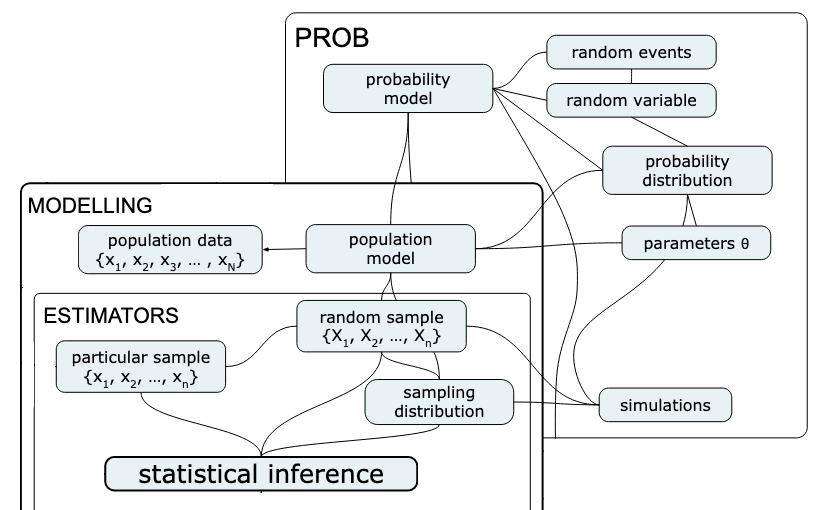

## Why probability theory?

- definition: a language for describing uncertainty and variability in data

- Originally started to quantify random events in gambling
  - example 1: `flip_coin` (see below)
  - example 2: `roll_die` (see below)


- Later extended to as a general purpose tool to model any process that contains uncertainty
  - random variables = described by probability distribution (CDF, pmf/pdf) modelled as a math function with parameters $\theta$
  - noise = can be modelled as a random variable
  - sampling = random selection of a subset from the population
  - prior beliefs = can be described as probability distributions


- Philosophical shit
  - long term averages = frequentist approach
  - state of knowledge = Bayesian approach


- Probability theory is an essential too for statistics


- Foundational subject that also used in physics, machine learning, biology, optimization, algorithms, etc.



In [258]:
# loading Python modules
import random
import numpy as np
import pandas as pd
import seaborn as sns

# notebooks figs setup
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,6)})
blue, orange  = sns.color_palette()[0], sns.color_palette()[1]

# silence annoying warnings
import warnings; warnings.filterwarnings('ignore')

## Random process examples using Python

Let's look at some simple examples of two random events: a coin flip and a die roll.

In [54]:
import random  # module for random number generation

random.random()  # random number between 0 (inclusive) and 1 (non-inclusive)

0.2580300400041893

In [55]:
### Example 1: coin flip

def flip_coin():
    r = random.random()  # a number in the range [0,1)
    if r < 0.5:
        return "heads"
    else:
        return "tails"

flip_coin()

'heads'

In [56]:
# Let's see if the coin is fair -- what happens after many flips?
flips = [flip_coin() for _ in range(0, 10000)]
heads = [flip for flip in flips if flip == "heads"]

len(heads)/len(flips)

0.4936

In [57]:
### Example 2: roll of a fair six-sided die

def roll_die():
    r = random.random()*6  # a number in the range [0,6)
    rint = int(r)          # convert to integer in {0,1,2,3,4,5}
    value = rint + 1       # convert to integer in {1,2,3,4,5,6}
    return value

roll_die()

1

In [58]:
rolls = [roll_die() for _ in range(0, 10000)]
ds = pd.Series(rolls)
ds.value_counts().sort_index()

1    1680
2    1651
3    1712
4    1678
5    1671
6    1608
dtype: int64

<AxesSubplot:>

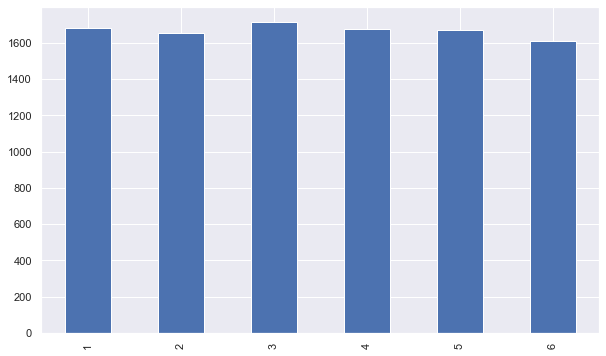

In [59]:
ds.value_counts().sort_index().plot(kind="bar")


### Why do we need probability theory in statistics?

Probability theory provides us with some essential tools needed for statistics:
  - modelling: describe a population as a probability distribution
  - sampling distributions: distributions obtained for random samples from a population
  - basically, there is "noise" and "uncertainty" in all the things, but if we can model
    the randomness, then it's very helpful...

Additionally, artificially introduced randomness is the basis for two of the most important statistics "kung fu" techniques:

- **random selection** = if you collect a sample of size n randomly selected from a population, then compute statistics from the sample, you can then make inferences about the whole population.
- **random assignment** = create two roughly equivalent groups by randomly assigning participants into group A or group B. This random split is the basis for a statistical experiment that compares an intervention group and a control group. Given the participants were randomly assigned to the two groups, we can hope they are roughly equally distributed on all dimensions (similar distribution of all confounding variables), so that any differences observed between groups can be attributed to the intervention. Calculating the difference statistic intervention-control give an estimate of the effect size of this intervention.

In the context of Amy's analysis of employee data:
- the split of new employees into NS and S groups is an example of random assignment
- the sample of 61 employees we're analyzing considered as representative of future employees


## Probability models

In probability theory, we model data as instances of a **random variable** described by a **probability distribution** (a math function) with particular parameters (usually denoted with greek letters like $\theta$, $\mu$, $\sigma$, etc.).

Multiple different ways to specify and interact with probability distributions:
- exact math model function (CDF from which we can extract pdf density function or pmf mass function).  
  This allows the most options: `rvs`, `cdf`, `pdf/pmf`, and stats like `mean`, `median`, `var/std`, `quartiles`.
- random draws form a generative process
- random draws from a real world process
- data for the whole population
- data for a sample from a population
- synthetic data sample obtained by resampling
  - bootstrap distribution
  - permutation test for no-difference-H0s

## Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) is described by the following probability density function
$$ \Large
  p_X(x)=\begin{cases}
  1 & \mathrm{for}\ 0 \le x \le 1, \\
  0 & \mathrm{for}\ x<0\ \mathrm{or}\ x>1
  \end{cases}
$$
where $X$ is the name of the random variable and $x$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $X=x$.
For a uniform distribution $U(0,1)$, each $x$ between 0 and 1 is equally likely to occur,
and values of $x$ outside this range have zero probability of occurring.

In [78]:
from scipy.stats import uniform

# create a uniform random variable U(0,1)
X = uniform(0, 1)
X

In [79]:
# draw 10 random samples from X
X.rvs(10)

array([0.50952111, 0.68602275, 0.48448348, 0.2168052 , 0.77316068,
       0.6713398 , 0.08250012, 0.98954759, 0.95200744, 0.98716843])

Text(0.5, 1.0, 'Probability density function $p_X$ for the uniform distribution between 0 and 1')

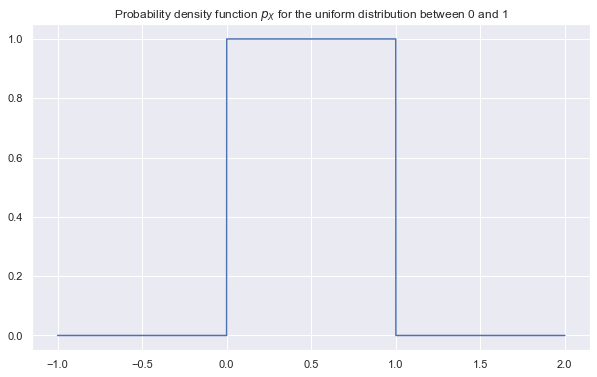

In [83]:
# plot the probability density function (pdf) of the random variable X
x = np.linspace(-1, 2, 10000)
pX = X.pdf(x)
sns.lineplot(x, pX).set_title("Probability density function $p_X$ for the uniform distribution between 0 and 1")

Text(0.5, 1.0, 'Cumulative probability density function $F_X$ for the uniform distribution between 0 and 1')

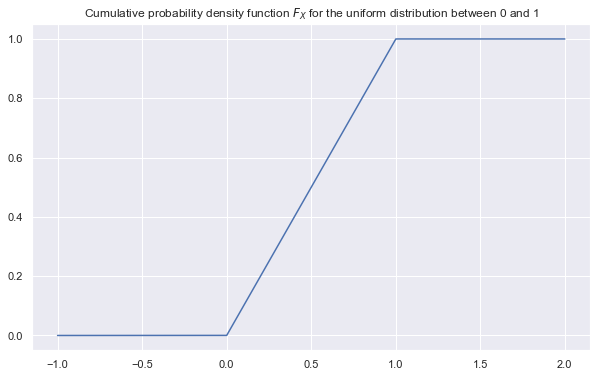

In [85]:
# plot the cumulative probability function (CDF) of the random variable X
x = np.linspace(-1, 2, 10000)
FX = X.cdf(x)
sns.lineplot(x, FX).set_title("Cumulative probability density function $F_X$ for the uniform distribution between 0 and 1")

## Normal probability distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is described by the following probability density function
$$ \Large
    f(x) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}
$$
having mean $\mu$ and standard deviation $\sigma$.Notation for this extremely common distribution is $\mathcal{N}(\mu, \sigma^2)$. 


(0.0, 0.006)

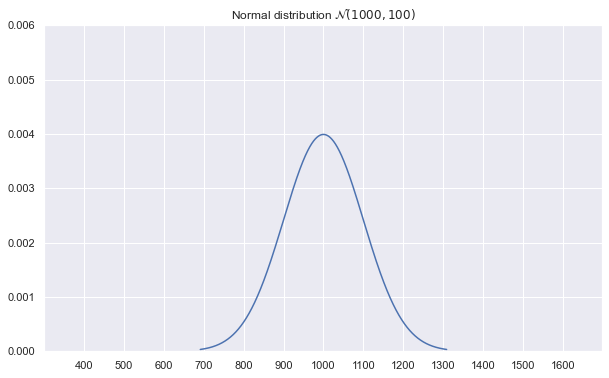

In [176]:
from scipy.stats import norm

# 1. choose the parameters:
mean = 1000   # 𝜇 (mu)    = where is its center?
std = 100     # 𝜎 (sigma) = how spread out is it?

# 2. create a normal random variable
rv = norm(loc=mean, scale=std)

# 3. plot it's probability density function
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 10000)
y = rv.pdf(x)
ax = sns.lineplot(x, y)
title = 'Normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
ax.set_title(title)
ax.set_xlim(300,1700)
plt.xticks(np.arange(400,1700,100))
ax.set_ylim(0, 0.006)

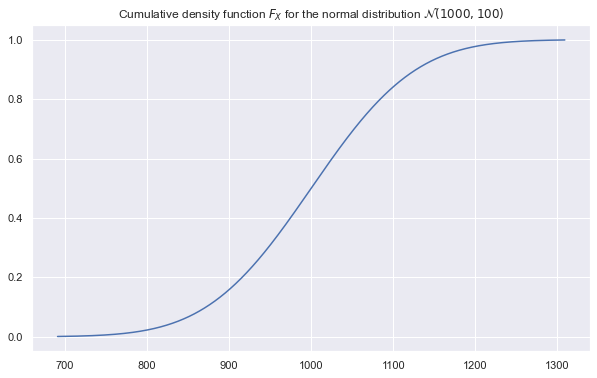

In [177]:
# plot the cumulative probability function (CDF) of the random variable rv
FX = rv.cdf(x)
title = 'Cumulative density function $F_X$ for the normal distribution $\mathcal{N}('+ str(mean) + ',' + str(std) + ')$'
_ = sns.lineplot(x, FX).set_title(title)


In [178]:
# the inverse CDF function
rv.ppf(0.3)

947.5599487291959

The median of the distribution is 1000.0


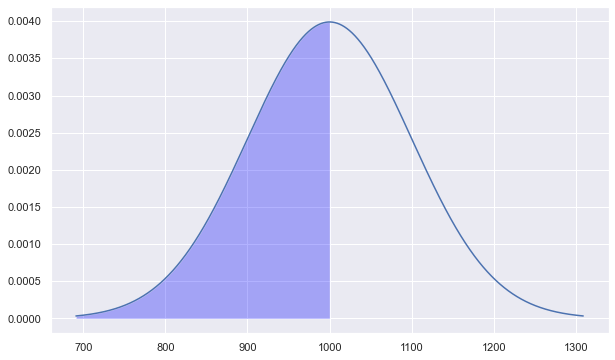

In [179]:
# median (a.k.a. second quartile)
print("The median of the distribution is", rv.ppf(0.5))

# highlight the lower half of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask50 = x < rv.ppf(0.5)
ax.fill_between(x[mask50], y1=y[mask50], alpha=0.3, facecolor='blue')

25% of the values of X are smaller than 932.5510249803918 (darker shaded region)
75% of the values of X are smaller than 1067.4489750196083 (lightly shaded region)


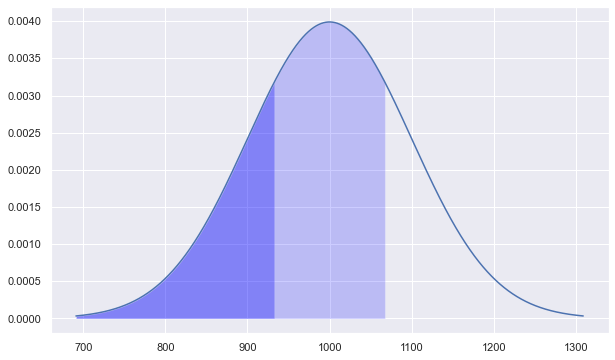

In [180]:
# first and third quartiles
print("25% of the values of X are smaller than", rv.ppf(0.25), "(darker shaded region)")
print("75% of the values of X are smaller than", rv.ppf(0.75), "(lightly shaded region)")

# highlight the lower 25% and lower 75% of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
mask25 = x < rv.ppf(0.25)
ax.fill_between(x[mask25], y1=y[mask25], alpha=0.3, facecolor='blue')
mask75 = x < rv.ppf(0.75)
ax.fill_between(x[mask75], y1=y[mask75], alpha=0.2, facecolor='blue')


0.9564320296354867

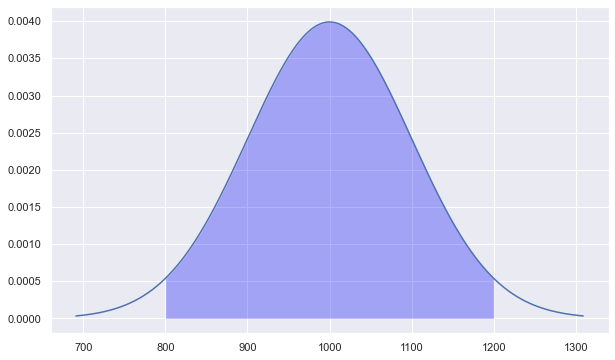

In [181]:
# how much of the total probability "weight" lies within 𝜇 ± n𝜎 = [𝜇-n𝜎, 𝜇+n𝜎]
mu = rv.mean()    # mean of the random variable
sigma = rv.std()  # standard deviaiton of the random variable
n = 2             # number of standard deviations around the mean

# highlight the selected area around the mean
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 10000)
y = rv.pdf(x)
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
# x, y = line.get_data()
mask = (x > mu-n*sigma) & (x < mu+n*sigma)
ax.fill_between(x[mask], y1=y[mask], alpha=0.3, facecolor='blue')


# calculate the probability of Pr{𝜇-n𝜎 < x < 𝜇+n𝜎}
sum(y[mask])/sum(y)

n = 1.959963984540054
Probability of observing value x < 804.0036015459946 or x > 1195.9963984540054 is 0.04809145694897295


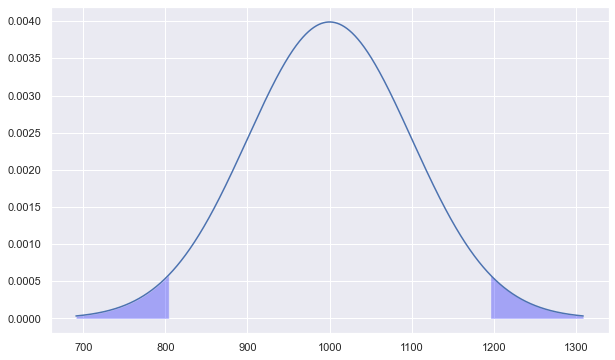

In [182]:
# tails of the distribution
n = norm.ppf(0.975)

print('n =', n)

# highlight the tails of the distribution
ax = sns.lineplot(x,y)
line = ax.get_lines()[-1]
# x, y = line.get_data()
mask_l = x < mu-n*sigma
mask_u = x > mu+n*sigma
ax.fill_between(x[mask_l], y1=y[mask_l], alpha=0.3, facecolor='blue')
ax.fill_between(x[mask_u], y1=y[mask_u], alpha=0.3, facecolor='blue')

# calculate the probability of Pr{x < 𝜇-n𝜎  OR  x > 𝜇+n𝜎}
tail_prob = (sum(y[mask_l]) + sum(y[mask_u]) )/sum(y)

print("Probability of observing value x <", mu-n*sigma, "or x >", mu+n*sigma, "is", tail_prob)

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are at least $n = 1.96$ standard deviations away from the mean.

We'll use this facts later in STATS to define a "cutoff value" for things that are unlikely to occur by chance.

### Eyeball modelling task

Let's try to guess the parameters $(\mu, \sigma)$ for the normal distribution that best describe  **Group NS** and **Group S** data samples.


In [188]:
# load dataframe we used in the first notebook
df = pd.read_csv('data/employee_lifetime_values.csv')
df

,group,ELV
0,NS,923.87
1,NS,751.38
2,NS,432.83
3,NS,1417.36
4,NS,973.24
...,...,...
56,S,931.61
57,S,1329.68
58,S,1293.03
59,S,1240.44


In [189]:
# descriptive statistics
df.groupby('group').describe()

ELV                                                                  \
      count        mean         std     min        25%       50%        75%   
group                                                                         
NS     31.0  1018.41129  265.815869  432.83   858.7750   990.130  1183.2750   
S      30.0  1148.43500  233.037704  623.06  1022.1375  1119.305  1279.8825   

                
           max  
group           
NS     1620.93  
S      1716.61

Text(0.5, 1.0, 'Group NS and superimposed `model_NS` distribution')

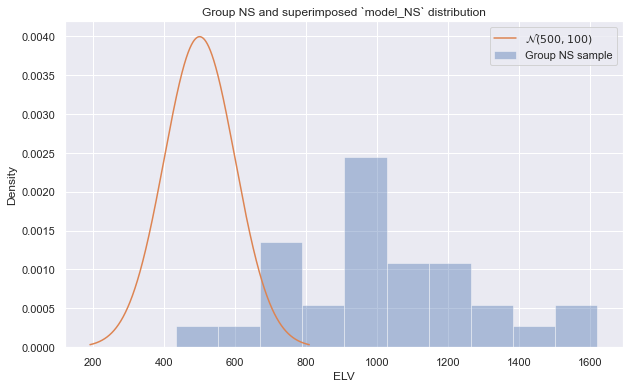

In [259]:
# load ELV data for Group NS
data_NS = df[df["group"]=="NS"]['ELV']

# plot a histogram of the data
ax = sns.distplot(data_NS, bins=10, norm_hist=True, kde=False, label="Group NS sample")
ax.set(xlabel='ELV', ylabel='Density')

# make a guess for the probabilty model that describes data_NS
mu_NS = 500      # 𝜇_NS (mu)
sigma_NS = 100   # 𝜎_NS (sigma)
model_NS = norm(loc=mu_NS, scale=sigma_NS)

# plot the model's probability density function
x = np.linspace(model_NS.ppf(0.001), model_NS.ppf(0.999), 10000)
y = model_NS.pdf(x)
ax = sns.lineplot(x, y, ax=ax, label='$\mathcal{N}('+ str(mu_NS) + ',' + str(sigma_NS) + ')$')
ax.set_title('Group NS and superimposed `model_NS` distribution')

### Estimating population parameters from sample statistics

Observe that the sample mean $\overline{x}_{NS}$ = `data_NS.mean()` and the sample variance $s_{NS}$ = `data_NS.std()` are good estimates for the distribution mean $\mu_{NS}$ and variance $\sigma_{NS}$.

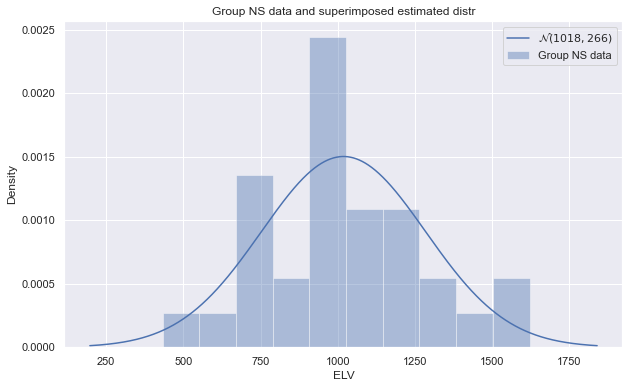

In [262]:
mu_est = data_NS.mean()   # obtained from sample mean
sigma_est = data_NS.std() # obtained from sample standard deviation
model_NS = norm(loc=mu_est, scale=sigma_est)

ax = sns.distplot(data_NS, bins=10, norm_hist=True, kde=False, label="Group NS data", color=blue)
ax.set(xlabel='ELV', ylabel='Density')
x = np.linspace(model_NS.ppf(0.001), model_NS.ppf(0.999), 10000)
y = model_NS.pdf(x)
label = '$\mathcal{N}(' + str(round(mu_est)) + ',' + str(round(sigma_est)) + ')$'
ax = sns.lineplot(x, y, ax=ax, label=label, color=blue)
_ = ax.set_title('Group NS data and superimposed estimated distr')


In other words, we don't need to do the "eyeball guessing" procedure in practice,
we can simply use functions for computing population parameter estimates.
More on that in the next notebook (see section Estimators).

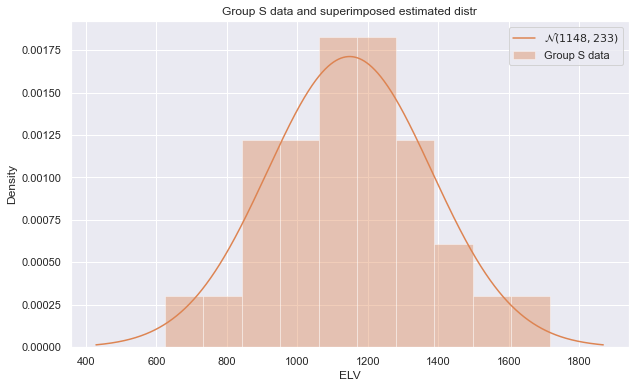

In [266]:
# load ELV data for Group S
data_S = df[df["group"]=="S"]['ELV']

# Estimate the population parameters for Group S data
mu_est = data_S.mean()   # obtained from sample mean
sigma_est = data_S.std() # obtained from sample standard deviation
model_S = norm(loc=mu_est, scale=sigma_est)

ax = sns.distplot(data_S, bins=10, norm_hist=True, kde=False, label="Group S data", color=orange)
ax.set(xlabel='ELV', ylabel='Density')
x = np.linspace(model_S.ppf(0.001), model_S.ppf(0.999), 10000)
y = model_S.pdf(x)
label = '$\mathcal{N}(' + str(round(mu_est)) + ',' + str(round(sigma_est)) + ')$'
ax = sns.lineplot(x, y, ax=ax, label=label, color=orange)
_ = ax.set_title('Group S data and superimposed estimated distr')

Text(0.5, 0, 'ELV')

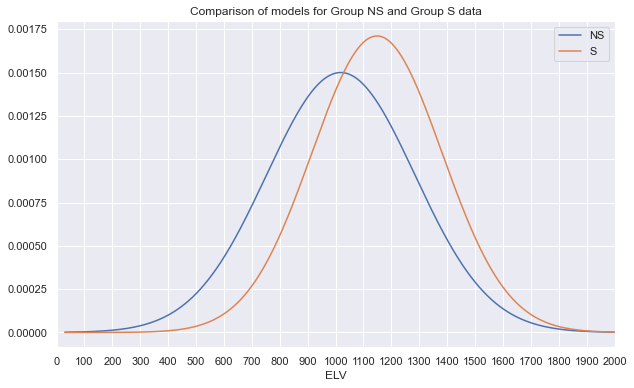

In [279]:
x = np.linspace(model_NS.ppf(0.0001), model_S.ppf(0.9999), 10000)
yNS = model_NS.pdf(x)
yS = model_S.pdf(x)

fig, ax = plt.subplots()
sns.lineplot(x, yNS, ax=ax, label="NS") #  color='black', alpha=0.5)
sns.lineplot(x, yS, ax=ax, label="S")
ax.set_title('Comparison of models for Group NS and Group S data')
ax.set_xlim(100,2000)
plt.xticks(np.arange(0,2100,100))
ax.set_xlabel('ELV')


## Random samples of size $n$

- sample statistics
  - ex 1: sample mean
  - ex 2: sample variance
  - ex 3: different between means (in a two group scenario)
- sampling distribution = describes variability of a statistic for different random samples
- observe behaviour of sample of size n from normal, as n increases
- CLT formula & simulation
  main idea in stats: we can use sample properties to estimate the parameters of the population


## Lead out

We've learned about data, we've learned about probability models and how given parameters produce different shapes of distributions.
Now we can finally talk about statistical analysis procedures which are principled way to compute estimates and make predictions.



Narrative:
- Amy has collected two samples
- we assume samples are representative of what we can expect from stats and non-stats employees in general
- we want to use the samples to infer the properties of the two populations
- in particular we're interested in the difference in population means $\Delta = \mu_S - \mu_{NS}$
  and we have two specific questions:
  1. Is there a difference (is $\Delta=0$ or $\Delta \neq 0$) ?
  2. How big is the difference $\Delta$?

 